In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic_df=pd.read_csv('titanic_train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [2]:
titanic_df.shape

(891, 12)

In [3]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# 결측치 파악

In [4]:
titanic_df['Age'].isnull().sum()

177

In [5]:
titanic_df['Cabin'].isnull().sum()

687

In [6]:
titanic_df['Embarked'].isnull().sum()

2

# 결측치 처리
#### Age : 평균나이
#### 나머지 : 'N'으로 변경

In [7]:
titanic_df['Age'].fillna(titanic_df['Age'].mean,inplace=True)
titanic_df['Cabin'].fillna('N',inplace=True)
titanic_df['Embarked'].fillna('N',inplace=True)

titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

# 문자열 변수(피처) 빈도 분포 확인 : value_counts()

In [8]:
print('Sex분포:',titanic_df['Sex'].value_counts())
print('Sex분포:',titanic_df['Cabin'].value_counts())
print('Sex분포:',titanic_df['Embarked'].value_counts())

Sex분포: male      577
female    314
Name: Sex, dtype: int64
Sex분포: N              687
B96 B98          4
C23 C25 C27      4
G6               4
D                3
              ... 
B38              1
C148             1
C45              1
D47              1
D7               1
Name: Cabin, Length: 148, dtype: int64
Sex분포: S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


In [9]:
titanic_df['Cabin'].str[:1]

0      N
1      C
2      N
3      C
4      N
      ..
886    N
887    B
888    N
889    C
890    N
Name: Cabin, Length: 891, dtype: object

In [10]:
titanic_df['Cabin']=titanic_df['Cabin'].str[:1]
titanic_df['Cabin'].value_counts()

N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

# 성별에 따른 생존자수 분포(EDA)

In [11]:
titanic_df.groupby('Sex')['Sex'].count()
#성별 분포 확인

Sex
female    314
male      577
Name: Sex, dtype: int64

In [12]:
titanic_df.groupby('Survived')['Survived'].count()
#생존 분포 확인        #사망:0 생존:1

Survived
0    549
1    342
Name: Survived, dtype: int64

In [13]:
titanic_df.groupby(['Sex','Survived'])['Survived'].count()
#성별에 따른 생존 확인

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

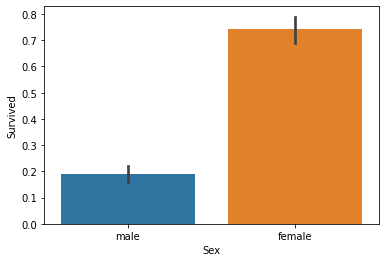

In [14]:
sns.barplot(x='Sex',y='Survived',data=titanic_df)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

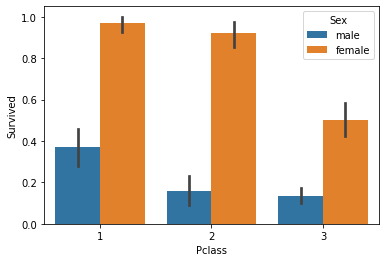

In [15]:
sns.barplot(x='Pclass',y='Survived',hue='Sex',data=titanic_df)

# 데이터 전처리 : 구간화(binning)

### 연령대에 따른 생존자수 분호
#### 연령은 수치형 변수이므로 범주형으로 구간화(binning)

In [20]:
def get_category(age):
    cat=''
    age=int(age)
    print(age)
    if age <=-1 : cat ='Unknown'
    elif age<=5 : cat ='Baby'
    elif age<=12 : cat ='Child'
    elif age<=18 : cat ='Teenager'
    elif age<=25 : cat ='Student'
    elif age<=35 : cat ='Young Adult'
    elif age<=60 : cat ='Adult'
    else: cat = 'Elderly'
    return cat

In [21]:
titanic_df['Age_cat'] = ''
group_names = ['Unknown','Baby','Child','Teenager','Student','Young Adult','Adult','Elderly']
# group_names.append(set(titanic['Age_cat']))
plt.figure(figsize=(10,6))
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x: get_category(x))
sns.barplot(x='Age_cat',y='Survived', hue='Sex',
           data= titanic, order=group_names)
titanic_df.drop(columns=['Age_cat'],inplace=True)

22
38
26
35
35


TypeError: int() argument must be a string, a bytes-like object or a number, not 'method'

<Figure size 720x432 with 0 Axes>

# 데이터 전처리 : 인코딩
### 문자열 카테고리 피처를 숫자형 카테고리 피처로 변환

In [ ]:
from sklearn import preprocessing